In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import re
import os

In [2]:
file_path = "D:\\DATA SCIENCE\\DATASETS\\Python\\Sales_Data\\"
file_name = "Sales_April_2019.csv"

# DAY 21

## f string

In [3]:
f'{file_path}{file_name}'

'D:\\DATA SCIENCE\\DATASETS\\Python\\Sales_Data\\Sales_April_2019.csv'

In [4]:
full_path = f'{file_path}{file_name}'

In [5]:
april19 = pd.read_csv(full_path)

****************************************

In [6]:
april19.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
april19.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18286,194003,Apple Airpods Headphones,1,150,04/18/19 11:38,"189 Lincoln St, Boston, MA 02215"
1355,177845,Lightning Charging Cable,1,14.95,04/22/19 13:21,"641 Meadow St, San Francisco, CA 94016"
2586,179034,Flatscreen TV,1,300,04/21/19 16:05,"260 Lake St, New York City, NY 10001"
14281,190177,AA Batteries (4-pack),1,3.84,04/11/19 10:51,"262 Elm St, Boston, MA 02215"
6115,182403,27in 4K Gaming Monitor,1,389.99,04/22/19 12:10,"901 Spruce St, Dallas, TX 75001"


#### Read data for all the months

In [8]:
os.listdir(file_path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [9]:
type(os.listdir(file_path))

list

In [10]:
annual_sales = pd.DataFrame()
for files in os.listdir(file_path):
    full_path = f'{file_path}{files}'
    df_temp = pd.read_csv(full_path)
    df_temp['src_file'] = files
    annual_sales = pd.concat([annual_sales,df_temp])
    print(f'the size of final df is {annual_sales.shape}. the size of df_temp is {df_temp.shape}')

the size of final df is (18383, 7). the size of df_temp is (18383, 7)
the size of final df is (30394, 7). the size of df_temp is (12011, 7)
the size of final df is (55511, 7). the size of df_temp is (25117, 7)
the size of final df is (67547, 7). the size of df_temp is (12036, 7)
the size of final df is (77270, 7). the size of df_temp is (9723, 7)
the size of final df is (91641, 7). the size of df_temp is (14371, 7)
the size of final df is (105263, 7). the size of df_temp is (13622, 7)
the size of final df is (120489, 7). the size of df_temp is (15226, 7)
the size of final df is (137124, 7). the size of df_temp is (16635, 7)
the size of final df is (154785, 7). the size of df_temp is (17661, 7)
the size of final df is (175164, 7). the size of df_temp is (20379, 7)
the size of final df is (186850, 7). the size of df_temp is (11686, 7)


In [11]:
annual_sales.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file
7852,201555,Google Phone,1,600,05/21/19 13:28,"449 Highland St, Los Angeles, CA 90001",Sales_May_2019.csv
10314,258046,AAA Batteries (4-pack),1,2.99,09/29/19 15:22,"524 7th St, Boston, MA 02215",Sales_September_2019.csv
8953,267904,Lightning Charging Cable,1,14.95,10/24/19 11:29,"716 13th St, Atlanta, GA 30301",Sales_October_2019.csv
1026,151481,Wired Headphones,1,11.99,02/18/19 23:29,"881 12th St, Seattle, WA 98101",Sales_February_2019.csv
13604,174998,27in 4K Gaming Monitor,1,389.99,03/19/19 22:13,"99 8th St, San Francisco, CA 94016",Sales_March_2019.csv


## SCDs

https://towardsdatascience.com/data-analysts-primer-to-slowly-changing-dimensions-d087c8327e08

In [12]:
annual_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
src_file            object
dtype: object

Q: *Convert quantity to integer*

In [13]:
annual_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [14]:
annual_sales.dropna(how="all",subset=annual_sales.columns[0:-1], inplace =True)

In [15]:
annual_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv


In [16]:
annual_sales.loc[(annual_sales['Quantity Ordered'] == "Quantity Ordered"),['Quantity Ordered']]

,Quantity Ordered
519,Quantity Ordered
1149,Quantity Ordered
1155,Quantity Ordered
2878,Quantity Ordered
2893,Quantity Ordered
...,...
10000,Quantity Ordered
10387,Quantity Ordered
11399,Quantity Ordered
11468,Quantity Ordered


    every so often the header gets repeated for readability. Use ~ to fetch not values that are actual values

In [17]:
annual_sales = annual_sales.loc[~(annual_sales['Quantity Ordered'] == "Quantity Ordered"),:]

In [18]:
annual_sales['Quantity Ordered'] = annual_sales['Quantity Ordered'].astype(int)
annual_sales['Price Each'] = annual_sales['Price Each'].astype(float)

In [19]:
annual_sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
src_file             object
dtype: object

In [20]:
annual_sales.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file
15073,190932,Wired Headphones,1,11.99,04/18/19 22:35,"593 Ridge St, San Francisco, CA 94016",Sales_April_2019.csv
2858,143946,Wired Headphones,2,11.99,01/18/19 18:15,"420 Cedar St, Dallas, TX 75001",Sales_January_2019.csv
7188,200918,Vareebadd Phone,1,400.00,05/08/19 16:18,"262 6th St, Los Angeles, CA 90001",Sales_May_2019.csv
7157,266191,AA Batteries (4-pack),1,3.84,10/13/19 16:09,"797 Cherry St, Austin, TX 73301",Sales_October_2019.csv
5119,283688,Google Phone,1,600.00,11/04/19 13:04,"367 1st St, New York City, NY 10001",Sales_November_2019.csv


In [21]:
annual_sales['Order Date'] = \
pd.to_datetime(annual_sales['Order Date'], format = '%m/%d/%y %H:%M')

In [22]:
annual_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
src_file                    object
dtype: object

In [23]:
annual_sales['Order Month'] = annual_sales['Order Date'].dt.month

annual_sales['Bill Amount'] = annual_sales['Quantity Ordered'] * annual_sales['Price Each']

annual_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file,Order Month,Bill Amount
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,4,11.99


In [24]:
annual_sales["Order Month Name"] = annual_sales['Order Date'].dt.month_name(locale='en_us')

In [25]:
annual_sales.groupby(["Order Month","Order Month Name"])["Bill Amount"].sum()

Order Month  Order Month Name
1            January             1822256.73
2            February            2202022.42
3            March               2807100.38
4            April               3390670.24
5            May                 3152606.75
6            June                2577802.26
7            July                2647775.76
8            August              2244467.88
9            September           2097560.13
10           October             3736726.88
11           November            3199603.20
12           December            4613443.34
Name: Bill Amount, dtype: float64

In [26]:
mnames = list(map(lambda x: x[1],annual_sales.groupby(["Order Month","Order Month Name"])["Bill Amount"].sum().index))

In [27]:
yval = annual_sales.groupby(["Order Month","Order Month Name"])["Bill Amount"].sum()

In [28]:
annual_sales.groupby(["Order Month","Order Month Name"])["Bill Amount"].sum()

Order Month  Order Month Name
1            January             1822256.73
2            February            2202022.42
3            March               2807100.38
4            April               3390670.24
5            May                 3152606.75
6            June                2577802.26
7            July                2647775.76
8            August              2244467.88
9            September           2097560.13
10           October             3736726.88
11           November            3199603.20
12           December            4613443.34
Name: Bill Amount, dtype: float64

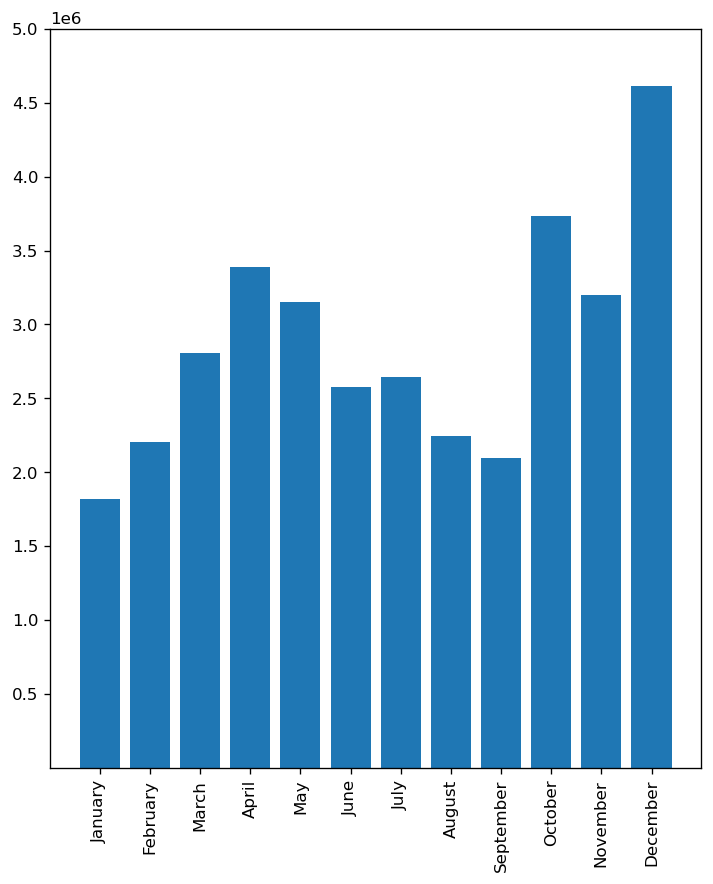

In [29]:
plt.figure(figsize=[7,8],
          dpi = 120)
bars = None
bars = plt.bar(mnames,yval)
plt.yticks(range(500_000,5_500_000,500_000))
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
ad = '917 1st St, Dallas, TX 75001'
ad.split(" ")[-2]

'TX'

In [31]:
annual_sales["State Code"] = annual_sales["Purchase Address"].str.split(" ").str.get(-2)

In [32]:
annual_sales["Purchase Address"].str.split(" ").str.get(-2)

0        TX
2        MA
3        CA
4        CA
5        CA
         ..
11681    CA
11682    CA
11683    CA
11684    CA
11685    CA
Name: Purchase Address, Length: 185950, dtype: object

In [33]:
annual_sales.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file,Order Month,Bill Amount,Order Month Name,State Code
9659,159726,Macbook Pro Laptop,1,1700.00,2019-02-13 09:54:00,"238 Willow St, San Francisco, CA 94016",Sales_February_2019.csv,2,1700.00,February,CA
5110,214767,Lightning Charging Cable,1,14.95,2019-06-29 16:34:00,"237 Pine St, New York City, NY 10001",Sales_June_2019.csv,6,14.95,June,NY
9310,218796,AA Batteries (4-pack),1,3.84,2019-06-25 20:46:00,"135 Spruce St, Boston, MA 02215",Sales_June_2019.csv,6,3.84,June,MA


### Q: Which state has the highest sale?

The state of CA has recorded maximum sales in the region of $13,714,774.71


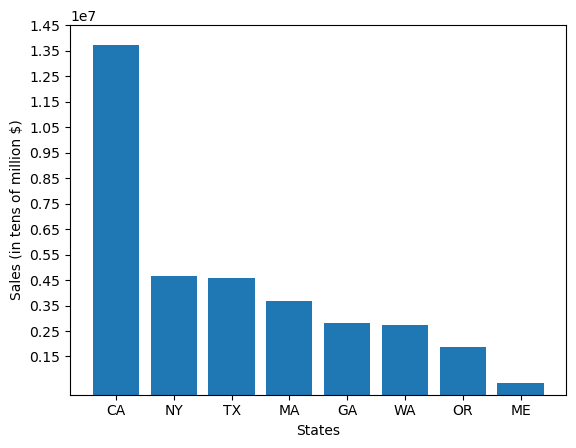

In [58]:
annual_sales["State Code"] = annual_sales["Purchase Address"].str.split(" ").str.get(-2)
max_state_sale =annual_sales.groupby(["State Code"])["Bill Amount"].sum().sort_values(ascending=False)
print(f'The state of {max_state_sale.index[0]} has recorded maximum sales in the region of ${max_state_sale[0]:,}')

bars = None
bars = plt.bar(max_state_sale.index,max_state_sale)
plt.yticks(range(1_500_000,15_500_000,1_000_000))
plt.xlabel('States')
plt.ylabel('Sales (in tens of million $)')
plt.show()

### Q: Which city has the highest sale?

The city of (' San Francisco', 'CA') has recorded maximum sales in the region of $8,262,203.91


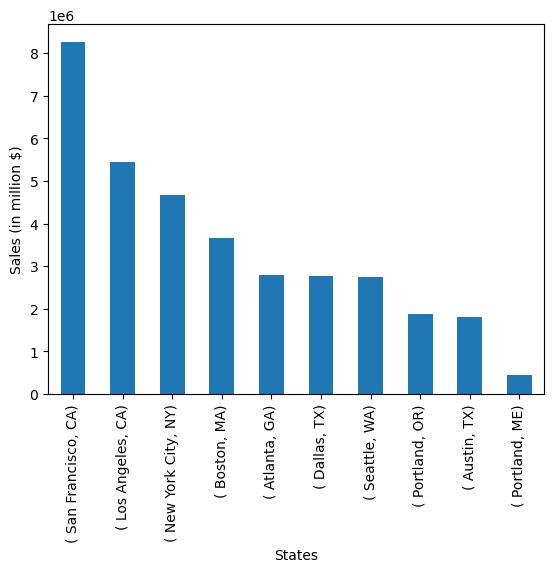

In [62]:
annual_sales["City"] = annual_sales["Purchase Address"].str.split("St,").str.get(-1).\
str.split(",").str.get(0)
max_city_sale = annual_sales.groupby(["City", "State Code"])["Bill Amount"].sum().sort_values(ascending=False)
print(f'The city of {max_city_sale.index[0]} has recorded maximum sales in the region of ${max_city_sale[0]:,}')

max_city_sale.plot.bar()
plt.xlabel('States')
plt.ylabel('Sales (in million $)')
plt.show()

In [36]:
annual_sales["Purchase Address"].str.split("St,").str.get(-1).\
str.split(",").str.get(0)

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [37]:
%%timeit
annual_sales["Purchase Address"].str.split("St,").str.get(-1).\
str.split(",").str.get(0)

1.11 s ± 164 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Q: During which hour is the footfall maximum?


Maximum footfall is recorded at 19:00 hrs, with 14,470 items ordered during that time.


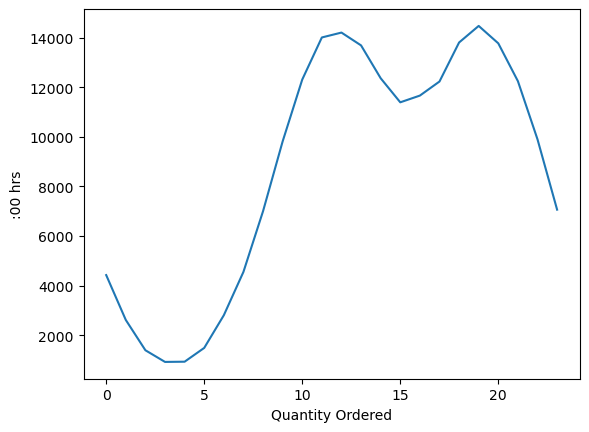

In [69]:
hourly_sales = annual_sales.groupby(annual_sales["Order Date"].dt.hour)["Quantity Ordered"].sum().sort_values(ascending=False)
print(f'Maximum footfall is recorded at {hourly_sales.index[0]}:00 hrs, with {hourly_sales[hourly_sales.index[0]]:,} items ordered during that time.')

y= annual_sales.groupby(annual_sales["Order Date"].dt.hour)["Quantity Ordered"].sum().sort_index(ascending=False)
y.plot.line()
plt.xlabel('Quantity Ordered')
plt.ylabel(':00 hrs')
plt.show()

In [40]:
annual_sales.groupby(annual_sales["Order Date"].dt.hour)["Quantity Ordered"].sum().sort_values(ascending=False)

Order Date
19    14470
12    14202
11    14005
18    13802
20    13768
13    13685
14    12362
10    12308
21    12244
17    12229
16    11662
15    11391
22     9899
9      9816
23     7065
8      7002
7      4556
0      4428
6      2810
1      2619
5      1493
2      1398
4       937
3       928
Name: Quantity Ordered, dtype: int32

### Q: Which two products are sold together the most?

In [41]:
annual_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,src_file,Order Month,Bill Amount,Order Month Name,State Code,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,4,23.90,April,TX,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,4,99.99,April,MA,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,4,600.00,April,CA,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,4,11.99,April,CA,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,4,11.99,April,CA,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",Sales_April_2019.csv,4,11.95,April,CA,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",Sales_April_2019.csv,4,99.99,April,WA,Seattle
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",Sales_April_2019.csv,4,11.95,April,GA,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",Sales_April_2019.csv,4,1700.00,April,CA,San Francisco
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",Sales_April_2019.csv,4,11.99,April,MA,Boston


In [42]:
annual_sales.groupby(["Order Date","Product"])["Bill Amount"].sum()

Order Date           Product                   
2019-01-01 03:07:00  Wired Headphones               11.99
2019-01-01 03:40:00  USB-C Charging Cable           11.95
2019-01-01 04:56:00  Apple Airpods Headphones      150.00
2019-01-01 05:53:00  AAA Batteries (4-pack)          2.99
2019-01-01 06:03:00  USB-C Charging Cable           23.90
                                                    ...  
2020-01-01 04:13:00  AAA Batteries (4-pack)          2.99
2020-01-01 04:21:00  USB-C Charging Cable           11.95
2020-01-01 04:54:00  Bose SoundSport Headphones     99.99
2020-01-01 05:13:00  Bose SoundSport Headphones     99.99
                     Lightning Charging Cable       14.95
Name: Bill Amount, Length: 181877, dtype: float64

### Answer:

In [86]:
import pandas as pd

# Assuming you have two DataFrames named annual_sales_left and annual_sales_right
cols = ["Order ID", "Order Date", "Product", "Quantity Ordered", "Price Each", "Bill Amount"]

# Merge two DataFrames
merged_df = pd.merge(left=annual_sales[cols],
                     right=annual_sales[cols],
                     left_on=["Order ID"],
                     right_on=["Order ID"],
                     how="inner",
                     suffixes=('_l', '_r'))

# Calculate the total quantity ordered for each combination
merged_df["tqo_lr"] = merged_df["Quantity Ordered_l"] + merged_df["Quantity Ordered_r"]

# Drop duplicate rows based on "Order ID"
final_merge = merged_df.loc[~(merged_df['Product_l'] == merged_df['Product_r'])].drop_duplicates(subset=["Order ID"], keep='first')

# Group by the combination of "Product_l" and "Product_r" and calculate the sum of "Order ID"
fmc = final_merge.groupby(["Product_l", "Product_r"]).size().sort_values(ascending=False)

# Extract the top combo and its count
top_combo = fmc.idxmax()
print(f'The {top_combo} combo was purchased most times {fmc.max()} times.')


The ('iPhone', 'Lightning Charging Cable') combo was purchased most times 1001 times.


In [89]:
cols = ["Order ID","Order Date","Product","Quantity Ordered","Price Each","Bill Amount"]
merged_df = pd.merge(left= annual_sales[cols],
        right= annual_sales[cols],
        left_on=["Order ID"],
        right_on=["Order ID"],
        how="inner",
        suffixes=('_l','_r'))
final_merge = merged_df.loc[~(merged_df['Product_l'] == merged_df['Product_r']),:]
final_merge.drop_duplicates(subset=["Order ID"],keep='first')
final_merge = final_merge.drop_duplicates(subset=["Order ID"],keep='first')
fmc = final_merge.groupby(["Product_l","Product_r"]).size().sort_values(ascending=False)
combo = list(map(lambda x: x[:2],fmc.index))
                                                      
print(f' The {combo[0]} combo was purchased most times at {fmc[0]:,}')

 The ('iPhone', 'Lightning Charging Cable') combo was purchased most times at 1,001


In [94]:
cols = ["Order ID","Order Date","Product","Quantity Ordered","Price Each","Bill Amount"]
merged_df = pd.merge(left= annual_sales[cols],
        right= annual_sales[cols],
        left_on=["Order ID"],
        right_on=["Order ID"],
        how="inner",
        suffixes=('_l','_r'))
merged_df["tqo_lr"] = merged_df["Quantity Ordered_l"] + merged_df["Quantity Ordered_r"]
final_merge = merged_df.loc[~(merged_df['Product_l'] == merged_df['Product_r']),:]
final_merge.drop_duplicates(subset=["Order ID"],keep='first')
final_merge = final_merge.drop_duplicates(subset=["Order ID"],keep='first')
fmc = final_merge.groupby(["Product_l","Product_r"])["Order ID"].count().sort_values(ascending=False)
combo = list(map(lambda x: x[:2],fmc.index))
                                                      
print(f' The {combo[0]} combo was purchased most times at {fmc[0]:,}')

 The ('iPhone', 'Lightning Charging Cable') combo was purchased most times at 1,001


https://realpython.com/pandas-project-gradebook/

In [95]:
fmc

Product_l        Product_r               
iPhone           Lightning Charging Cable    1001
Google Phone     USB-C Charging Cable         984
iPhone           Wired Headphones             362
Vareebadd Phone  USB-C Charging Cable         361
iPhone           Apple Airpods Headphones     313
                                             ... 
LG Dryer         Flatscreen TV                  1
                 AAA Batteries (4-pack)         1
Vareebadd Phone  iPhone                         1
LG Dryer         27in FHD Monitor               1
Google Phone     27in 4K Gaming Monitor         1
Name: Order ID, Length: 296, dtype: int64

In [44]:
final_merge = merged_df.loc[~(merged_df['Product_l'] == merged_df['Product_r']),:]

In [78]:
final_merge.drop_duplicates(subset=["Order ID"],keep='first')

,Order ID,Order Date_l,Product_l,Quantity Ordered_l,Price Each_l,Bill Amount_l,Order Date_r,Product_r,Quantity Ordered_r,Price Each_r,Bill Amount_r,tqo_lr
3,176560,2019-04-12 14:38:00,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Wired Headphones,1,11.99,11.99,2
20,176574,2019-04-03 19:42:00,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,USB-C Charging Cable,1,11.95,11.95,2
38,176586,2019-04-10 17:00:00,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,Google Phone,1,600.00,600.00,3
127,176672,2019-04-12 11:07:00,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,USB-C Charging Cable,1,11.95,11.95,2
139,176681,2019-04-20 10:39:00,Apple Airpods Headphones,1,150.00,150.00,2019-04-20 10:39:00,ThinkPad Laptop,1,999.99,999.99,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201667,259277,2019-09-28 13:07:00,iPhone,1,700.00,700.00,2019-09-28 13:07:00,Wired Headphones,2,11.99,23.98,3
201693,259297,2019-09-15 18:54:00,iPhone,1,700.00,700.00,2019-09-15 18:54:00,Lightning Charging Cable,1,14.95,14.95,2
201707,259303,2019-09-20 20:18:00,34in Ultrawide Monitor,1,379.99,379.99,2019-09-20 20:18:00,AA Batteries (4-pack),1,3.84,3.84,2
201721,259314,2019-09-16 00:25:00,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,AAA Batteries (4-pack),2,2.99,5.98,3


In [55]:
merged_df.drop('tba_lr',axis=1)

,Order Date,Product_l,Quantity Ordered_l,Price Each_l,Bill Amount_l,Product_r,Quantity Ordered_r,Price Each_r,Bill Amount_r,tqo_lr
0,2019-04-19 08:46:00,USB-C Charging Cable,2,11.95,23.90,USB-C Charging Cable,2,11.95,23.90,4
1,2019-04-19 08:46:00,USB-C Charging Cable,2,11.95,23.90,Wired Headphones,1,11.99,11.99,3
2,2019-04-19 08:46:00,Wired Headphones,1,11.99,11.99,USB-C Charging Cable,2,11.95,23.90,3
3,2019-04-19 08:46:00,Wired Headphones,1,11.99,11.99,Wired Headphones,1,11.99,11.99,2
4,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.99,99.99,Bose SoundSport Headphones,1,99.99,99.99,2
...,...,...,...,...,...,...,...,...,...,...
295059,2019-09-07 15:49:00,USB-C Charging Cable,1,11.95,11.95,USB-C Charging Cable,1,11.95,11.95,2
295060,2019-09-01 16:00:00,iPhone,1,700.00,700.00,iPhone,1,700.00,700.00,2
295061,2019-09-23 07:39:00,iPhone,1,700.00,700.00,iPhone,1,700.00,700.00,2
295062,2019-09-19 17:30:00,34in Ultrawide Monitor,1,379.99,379.99,34in Ultrawide Monitor,1,379.99,379.99,2


In [46]:
merged_df["tqo_lr"] = merged_df["Quantity Ordered_l"] + merged_df["Quantity Ordered_r"]

In [47]:
merged_df["tqo_lr"] = merged_df["Quantity Ordered_l"] + merged_df["Quantity Ordered_r"]
final_merge = merged_df.loc[~(merged_df['Product_l'] == merged_df['Product_r']),:]
fmc = final_merge.groupby(["Product_l","Product_r"])["tba_lr"].sum().sort_values(ascending=False)
combo = list(map(lambda x: x[:2],fmc.index))
                                                      
print(f' The {combo[0]} combo was purchased most times at {fmc[0]:,}')

 The ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)') combo was purchased most times at 3,723


In [66]:
final_merge.groupby(["Product_l","Product_r"])["tqo_lr"].sum().sort_values(ascending=False)

Product_l                 Product_r               
Lightning Charging Cable  iPhone                      2100
iPhone                    Lightning Charging Cable    2100
USB-C Charging Cable      Google Phone                2081
Google Phone              USB-C Charging Cable        2081
iPhone                    Wired Headphones             963
                                                      ... 
Google Phone              LG Dryer                       2
27in 4K Gaming Monitor    LG Washing Machine             2
ThinkPad Laptop           LG Dryer                       2
Flatscreen TV             LG Dryer                       2
Vareebadd Phone           LG Dryer                       2
Name: tqo_lr, Length: 318, dtype: int32

In [49]:
final_merge.groupby(["Product_l","Product_r"])["tqo_lr"].sum()

Product_l     Product_r             
20in Monitor  27in 4K Gaming Monitor     141
              27in FHD Monitor           178
              34in Ultrawide Monitor     167
              AA Batteries (4-pack)      618
              AAA Batteries (4-pack)     637
                                        ... 
iPhone        Macbook Pro Laptop         222
              ThinkPad Laptop            150
              USB-C Charging Cable       834
              Vareebadd Phone             72
              Wired Headphones          1699
Name: tba_lr, Length: 342, dtype: int32

In [50]:
list(map(lambda x: x[1:3],final_merge.groupby(["Order Date","Product_l","Product_r"])["tqo_lr"].sum().sort_values(ascending=False).index))[0]

('AA Batteries (4-pack)', 'Apple Airpods Headphones')

In [56]:
final_merge.groupby(["Product_l","Product_r"])["tqo_lr"].sum().sort_values(ascending=False)

Product_l                 Product_r             
AA Batteries (4-pack)     AAA Batteries (4-pack)    3723
AAA Batteries (4-pack)    AA Batteries (4-pack)     3723
                          USB-C Charging Cable      3567
USB-C Charging Cable      AAA Batteries (4-pack)    3567
Lightning Charging Cable  AAA Batteries (4-pack)    3334
                                                    ... 
Vareebadd Phone           LG Washing Machine           6
LG Washing Machine        LG Dryer                     2
LG Dryer                  Vareebadd Phone              2
                          LG Washing Machine           2
Vareebadd Phone           LG Dryer                     2
Name: tqo_lr, Length: 342, dtype: int32

In [52]:
final_merge.loc[final_merge['Product_r'].str.find('AA')>-1]

,Order Date,Product_l,Quantity Ordered_l,Price Each_l,Bill Amount_l,Product_r,Quantity Ordered_r,Price Each_r,Bill Amount_r,tqo_lr,tba_lr
5,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.99,99.99,AA Batteries (4-pack),1,3.84,3.84,2,2
31,2019-04-12 10:58:00,USB-C Charging Cable,1,11.95,11.95,AA Batteries (4-pack),1,3.84,3.84,2,2
34,2019-04-12 10:58:00,27in 4K Gaming Monitor,1,389.99,389.99,AA Batteries (4-pack),1,3.84,3.84,2,2
64,2019-04-16 19:23:00,27in 4K Gaming Monitor,1,389.99,389.99,AAA Batteries (4-pack),1,2.99,2.99,2,2
94,2019-04-27 12:20:00,Bose SoundSport Headphones,1,99.99,99.99,AAA Batteries (4-pack),1,2.99,2.99,2,2
...,...,...,...,...,...,...,...,...,...,...,...
294758,2019-09-18 01:00:00,USB-C Charging Cable,1,11.95,11.95,AAA Batteries (4-pack),1,2.99,2.99,2,2
294873,2019-09-08 21:15:00,AAA Batteries (4-pack),2,2.99,5.98,AA Batteries (4-pack),1,3.84,3.84,3,3
294874,2019-09-08 21:15:00,AA Batteries (4-pack),1,3.84,3.84,AAA Batteries (4-pack),2,2.99,5.98,3,3
294997,2019-09-19 18:03:00,Bose SoundSport Headphones,1,99.99,99.99,AA Batteries (4-pack),2,3.84,7.68,3,3


# DAY 22